In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sleep_eeg.pre_processing.sleep_cycles import *
from sleep_eeg.plotting.sleep_cycles import *
from sleep_eeg.plotting.morning_questionnaire import *
from sleep_eeg.plotting.model_comparaison import *
from sleep_eeg.utils import *

In [2]:
mq = load_mq_file()
night_ids = get_night_identifications(mq)
sleep_stage_cycles = get_sleep_stages(night_ids)

In [3]:
sleep_durations_latencies_df = extract_sleep_times_lantencies_wake_up_info(
    sleep_stage_cycles, night_ids
)
sleep_stages_changements = get_sleep_stage_changement(
    sleep_stages=sleep_stage_cycles, night_ids=night_ids
)
sleep_stages_continuity = get_sleep_stage_continuity(
    sleep_stages=sleep_stage_cycles, night_ids=night_ids
)
fourier_elements_df = get_fourier_elements_df(
    sleep_stages=sleep_stage_cycles, night_ids=night_ids, nbr_elements=3
)

In [4]:
night_id = "B01_N3"
sleep_stage_cycle = sleep_stage_cycles[night_ids.index(night_id)]

c:\users\gbrag\onedrive\desktop\ml\ml-project-2-malm\sleep_eeg\plotting\sleep_cycles.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


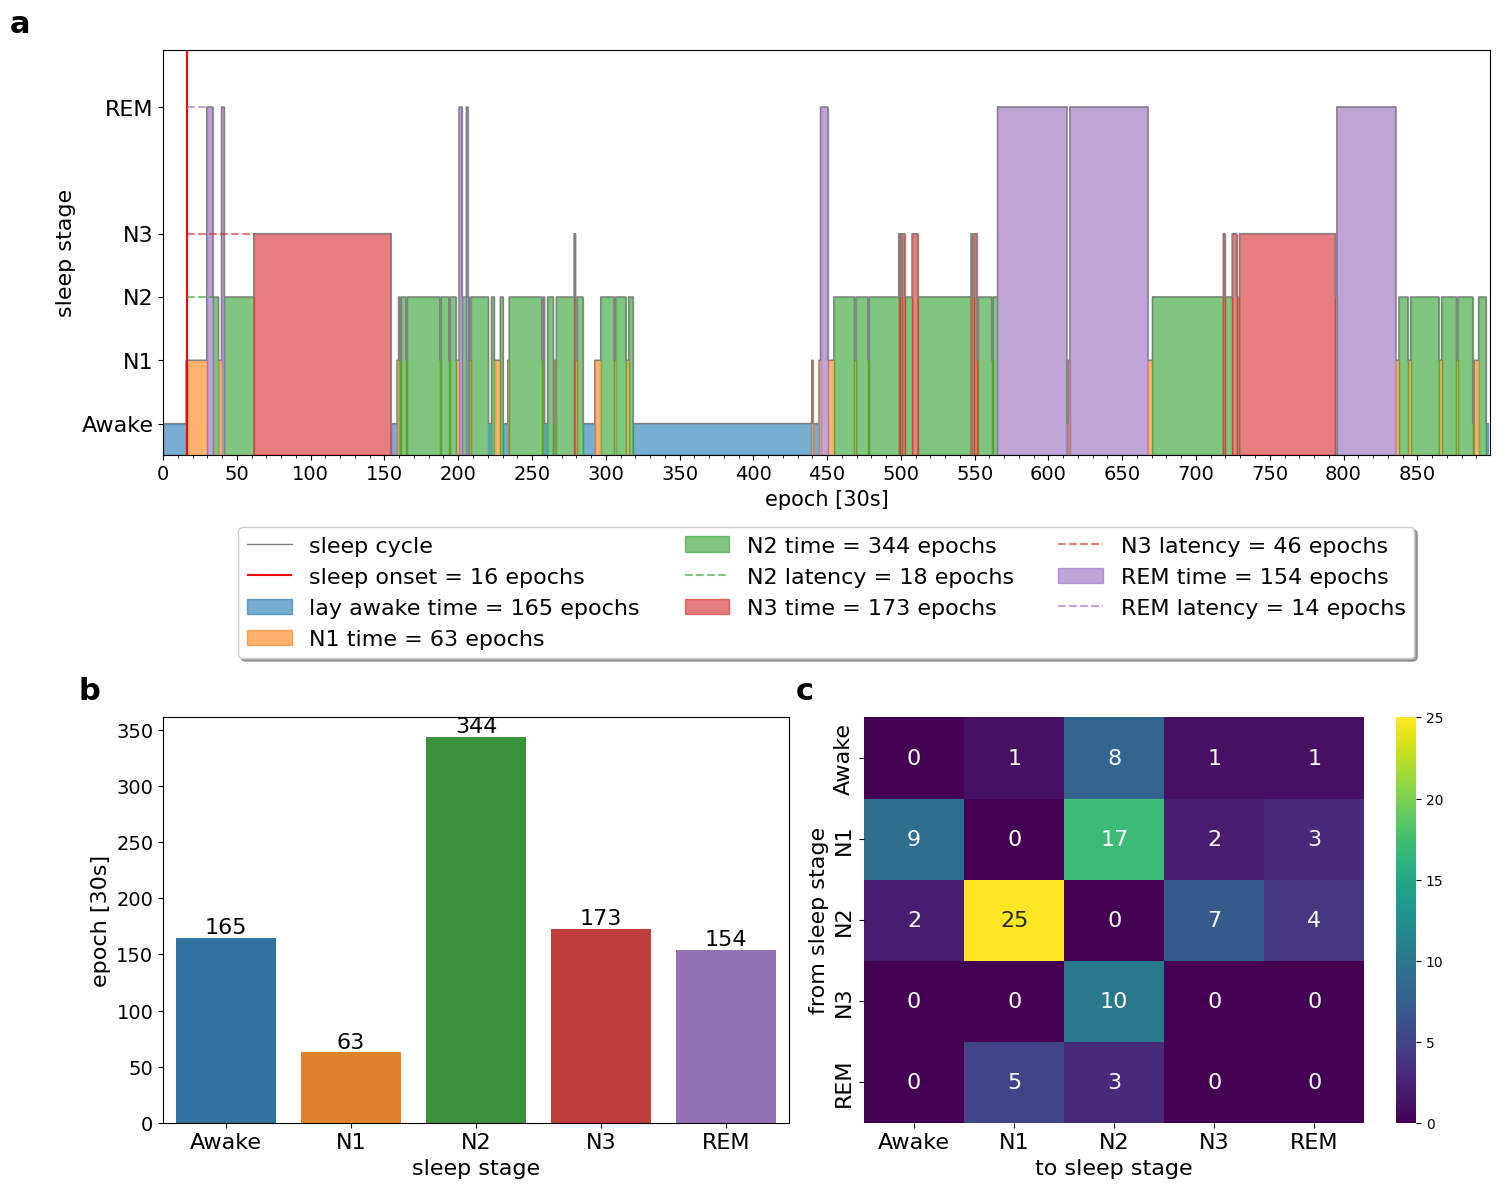

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Create a 2x2 grid with different row and column spans
fig = plt.figure(figsize=(15, 12))

gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])
ax1 = plt.subplot(gs[0, :])  # First subplot spanning the entire first row
ax2 = plt.subplot(gs[1, 0])  # Second subplot in the second row, first column
ax3 = plt.subplot(gs[1, 1])  # Third subplot in the second row, second column

# Plot data on each subplot
plot_sleep_cycle(
    ax=ax1,
    night_id=night_id,
    sleep_stage_cycle=sleep_stage_cycle,
    sleep_durations_latencies_df=sleep_durations_latencies_df,
)

ax1.text(
    -0.1,
    1.1,
    "a",
    transform=ax1.transAxes,
    fontsize=22,
    fontweight="bold",
    va="top",
    ha="right",
)
ax2.text(
    -0.1,
    1.1,
    "b",
    transform=ax2.transAxes,
    fontsize=22,
    fontweight="bold",
    va="top",
    ha="right",
)
ax3.text(
    -0.1,
    1.1,
    "c",
    transform=ax3.transAxes,
    fontsize=22,
    fontweight="bold",
    va="top",
    ha="right",
)

plot_sleep_stage_epochs(
    sleep_durations_latencies_df=sleep_durations_latencies_df,
    night_id=night_id,
    ax=ax2,
    title="",
)
ax3 = plot_sleep_stage_change(
    sleep_stages_changements=sleep_stages_changements, night_id=night_id
)
ax3.set_title("")


plt.tight_layout()
plt.show()

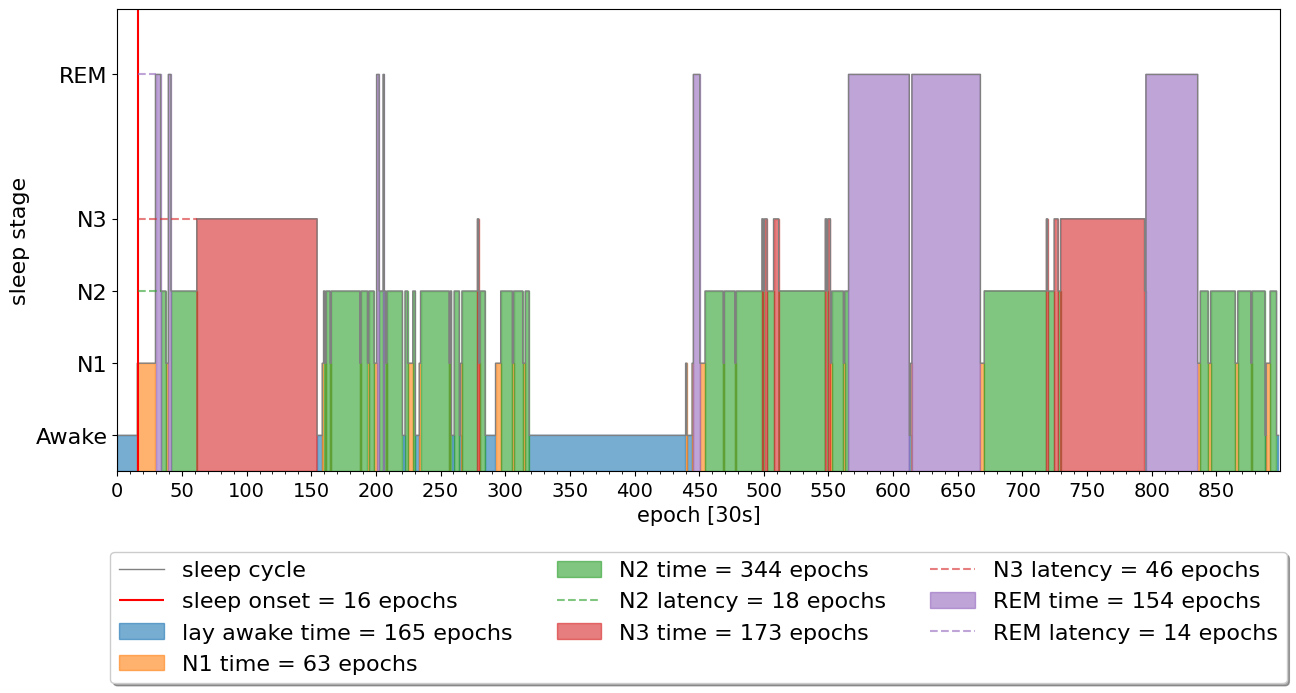

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_sleep_cycle(
    ax=ax,
    night_id=night_id,
    sleep_stage_cycle=sleep_stage_cycle,
    sleep_durations_latencies_df=sleep_durations_latencies_df,
)

In [7]:
ax = plot_sleep_stage_epochs(
    sleep_durations_latencies_df=sleep_durations_latencies_df, night_id=night_id
)
ax.set_yticks(ax.get_yticks())

TypeError: plot_sleep_stage_epochs() missing 1 required positional argument: 'ax'

c:\users\gbrag\onedrive\desktop\ml\ml-project-2-malm\sleep_eeg\plotting\sleep_cycles.py:221: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


<Axes: title={'center': 'Total sleep time percentage of each sleep stage for 1 night'}, xlabel='sleep stage', ylabel='[%]'>

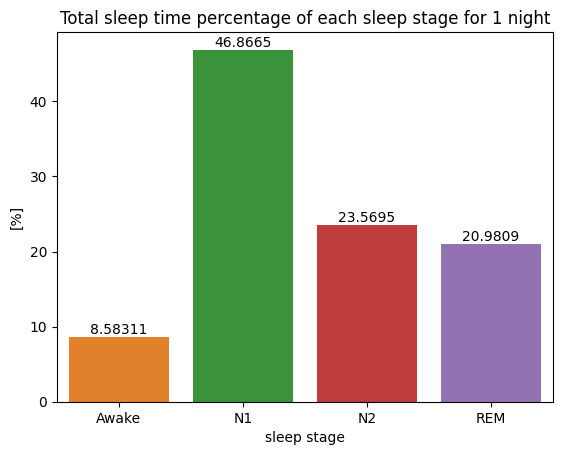

In [ ]:
plot_sleep_stage_percentage(
    sleep_stage_cycle=sleep_stage_cycle, xtick_labels=["Awake", "N1", "N2", "REM"]
)

c:\users\gbrag\onedrive\desktop\ml\ml-project-2-malm\sleep_eeg\plotting\sleep_cycles.py:270: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(sleep_stages_continuity.loc[night_id], palette=colors)


<Axes: title={'center': 'Sleep stage continuity for night B01_N3'}, xlabel='sleep stage', ylabel='number of changes'>

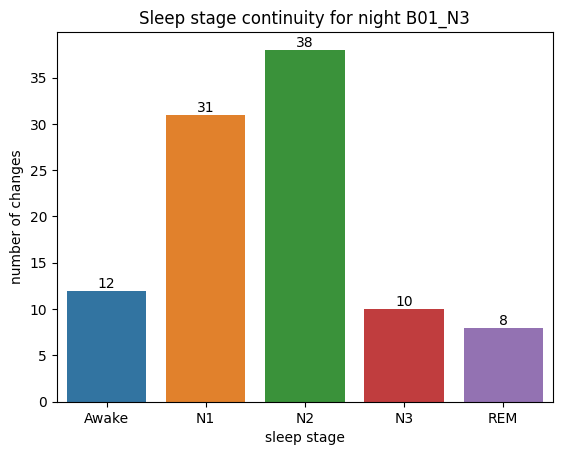

In [ ]:
plot_sleep_continuity(
    sleep_stages_continuity=sleep_stages_continuity, night_id=night_id
)

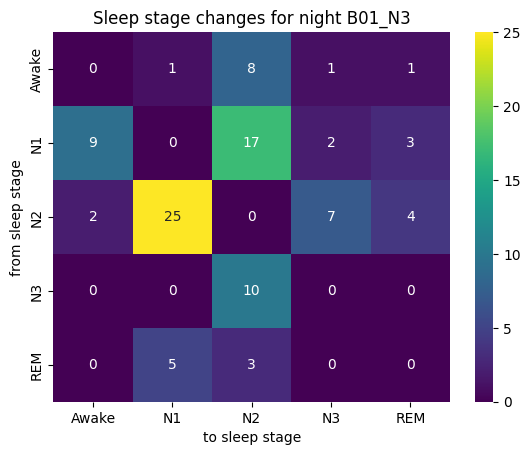

In [ ]:
ax = plot_sleep_stage_change(
    sleep_stages_changements=sleep_stages_changements, night_id=night_id
)

<Axes: title={'center': 'Average sleep stage epochs for all nights (n=127)'}, xlabel='sleep stage', ylabel='epoch [30s]'>

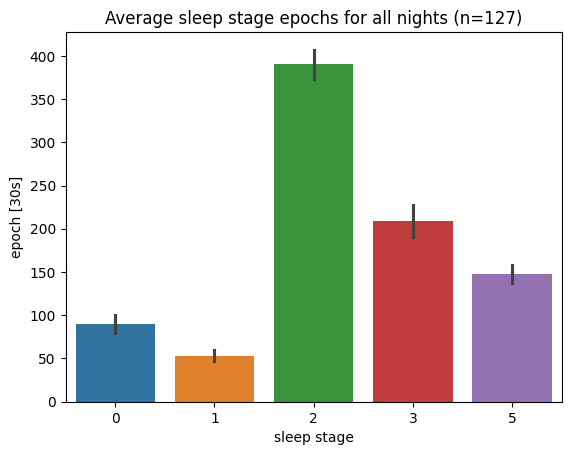

In [ ]:
plot_average_sleep_stage_epochs(
    sleep_durations_latencies_df=sleep_durations_latencies_df
)

In [ ]:
def plot_mq_histograms(
    mq: pd.DataFrame,
    layout: tuple = (2, 5),
    figsize: tuple = (15, 5),
    percentiles: list[float] = [0.25, 0.5, 0.75],
    mq_classified_index: list[int] = [3, 4, 5, 6, 7, 8, 9],
    mq_names: list[str] = [
        "Time to fall asleep [min]",
        "Wake ups during the night",
        "Time awake during the night [min]",
        "Calm sleep",
        "Sleep superficiality",
        "Recovery",
        "Mood today",
        "Energy today",
        "Feeling tense",
        "Concentration",
    ],
) -> tuple:
    """Plot morning questionnaire distributions as histograms with percentiles.
    Args:
        mq (pd.DataFrame): Morning questionnaire dataframe.
        layout (tuple, optional): Subplot layout. Defaults to (2,5). Alternative is (3,4).
        figsize (tuple, optional): Figure size. Defaults to (15,5). Alternative is (10,8).
        percentiles (list[float], optional): Percentiles to plot. Defaults to [0.25, 0.5, 0.75].
        mq_classified_index (list[int], optional): Index of the mqs that are classified. Defaults to [3,4,5,6,7,8,9].
        mq_names (list[str], optional): Names of the questions. Defaults to ["Time to fall asleep [min]","Wake ups during the night","Time awake during the night [min]","Calm sleep","Sleep superficiality","Recovery","Mood today","Energy today","Feeling tense","Concentration",].
    Returns:
        tuple: Figure and axes.
    """
    sns.set_theme(style="darkgrid")
    mqs = [m for m in mq.columns.tolist() if m.startswith("mq")]
    percentiles_name = [
        f"{percentage}%"
        for percentage in (np.round(percentiles, decimals=2) * 100).astype(int).tolist()
    ]
    quantile_df = mq.describe(percentiles=percentiles)

    fig, axes = plt.subplots(nrows=layout[0], ncols=layout[1], figsize=figsize)
    axes = axes.flatten()

    for spot, (ax, metric) in enumerate(zip(axes, mqs)):
        sns.histplot(
            mq,
            x=metric,
            kde=True,
            ax=ax,
            common_norm=True,
            # hue="Drug",
        )
        ax.set_xlabel(mq_names[mqs.index(metric)])

        if mqs.index(metric) in mq_classified_index:
            quantiles = [quantile_df[metric][p] for p in percentiles_name]
            # ax.set_xticks(quantiles)
            # ax.set_xticklabels(np.floor(quantiles).astype(int).tolist())#, rotation= 90)
            kde_line = sns.kdeplot(mq[metric], ax=ax, color="red")
            x_kde, y_kde = ax.lines[0].get_xydata().T
            ax.lines[1].remove()
            del kde_line
            for q in quantiles:
                idx = np.argmin(np.abs(x_kde - q))
                ax.axvline(
                    x=x_kde[idx],
                    ymin=0,
                    ymax=y_kde[idx] / ax.get_ylim()[1],
                    color="C0",
                    linestyle="--",
                )
    if layout == (3, 4) or layout == (4, 3):
        axes[10].axis("off")
        axes[11].axis("off")
    plt.tight_layout()
    return fig, axes

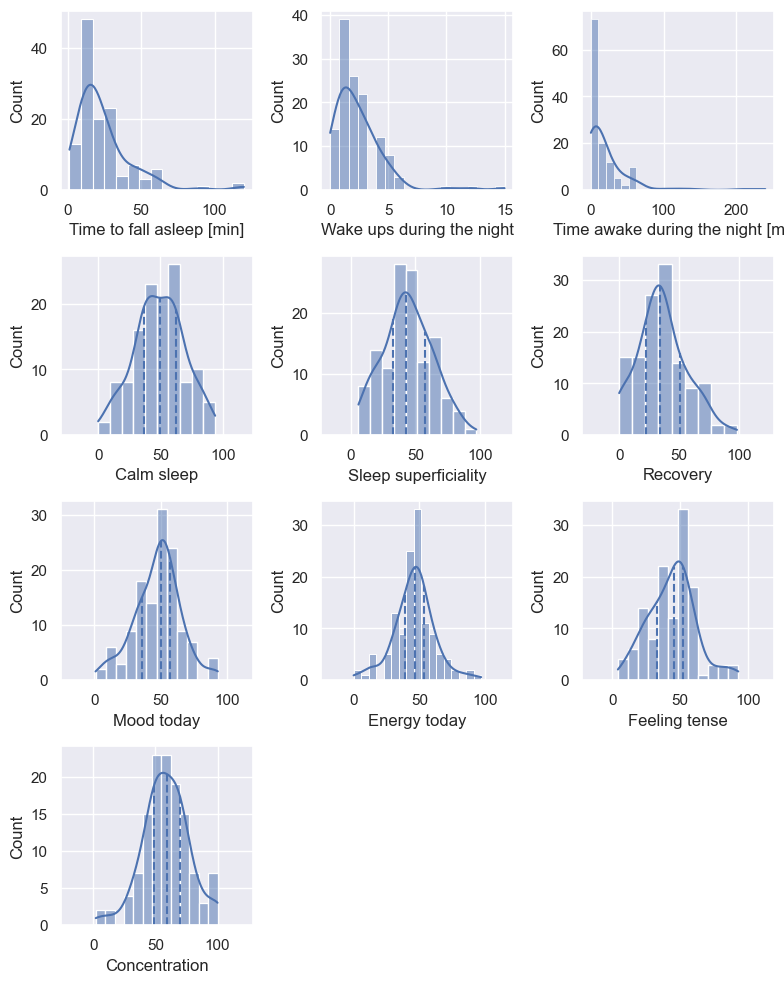

In [ ]:
fig, axes = plot_mq_histograms(mq, layout=(4, 3), figsize=(8, 10))
# plot_mq_histograms(mq,layout = (2,5), figsize = (15,5))

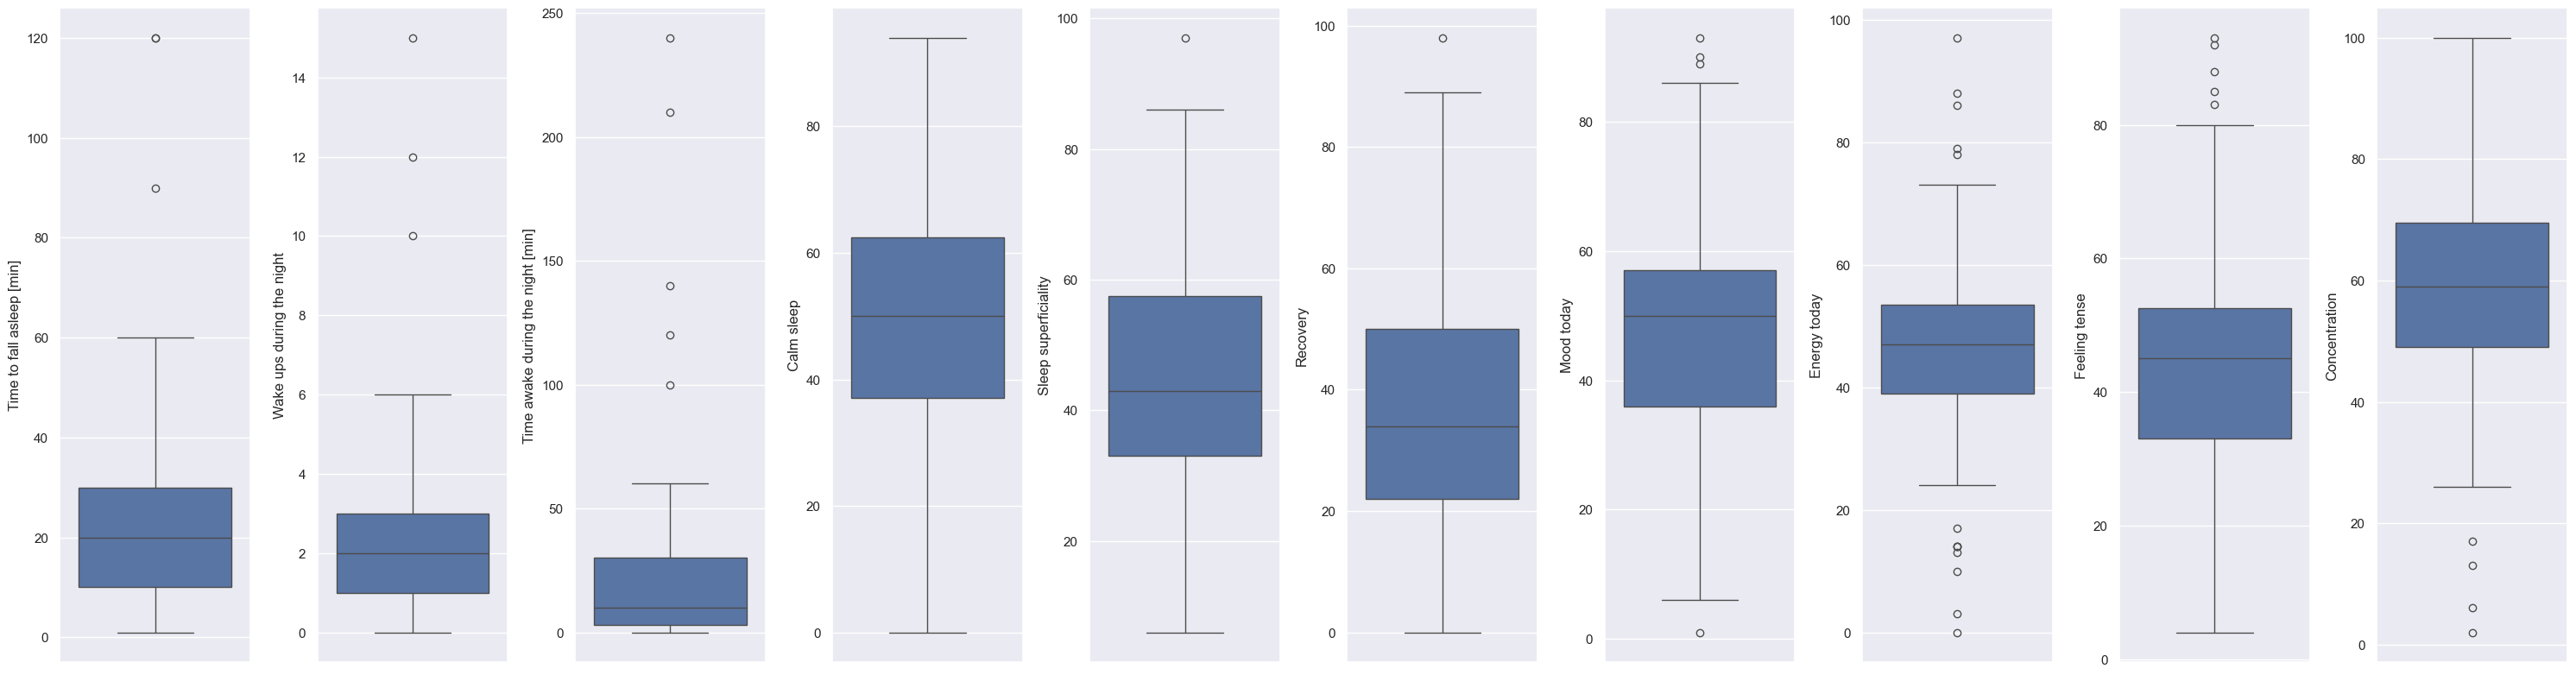

In [ ]:
fig, axes = plot_mq_boxplot(mq)